In [8]:
import math

In [34]:
wheel_radius = 0.035
robot_track = 0.2
max_rpm = 100

In [35]:
def differential_drive_pose_update(pose, linX, angX, dt):
    pose[0] += linX * dt * math.cos(pose[2])
    pose[1] += linX * dt * math.sin(pose[2])
    pose[2] += angX * dt
    pose[3] = linX
    pose[4] = angX
    return pose

In [40]:
def differential_drive_velocity(rpmR, rpmL):
    linX = (rpmR + rpmL) * math.pi * wheel_radius / 60
    angX = (rpmR - rpmL) * math.pi * wheel_radius / robot_track / 60
    return linX, angX

In [41]:
def differential_drive_rpm(linX, angX):
    rpmR = (linX + angX * robot_track / 2) * 60 / math.pi / wheel_radius
    rpmL = (linX - angX * robot_track / 2) * 60 / math.pi / wheel_radius
    return rpmR, rpmL

In [42]:
def limit_rpm(rpmR, rpmL):
    if abs(rpmR) > max_rpm or abs(rpmL) > max_rpm:
        higher = max(abs(rpmR), abs(rpmL))
        rpmR = max_rpm * rpmR / higher
        rpmL = max_rpm * rpmL / higher
    return rpmR, rpmL

In [43]:
max_linX = differential_drive_velocity(max_rpm, max_rpm)
max_angX = differential_drive_velocity(max_rpm, -max_rpm)
print(max_linX, max_angX)

(0.36651914291880927, 0.0) (0.0, 1.8325957145940461)


In [ ]:
def find_max_linX(angZ):
    return max_linX[0] - abs(angZ) * robot_track / 2

[-1.5208379310729538, -1.4711276743037345, -1.4219063791853994, -1.373400766945016, -1.3258176636680326, -1.2793395323170293, -1.2341215074081693, -1.1902899496825317, -1.147942400661956, -1.1071487177940906, -1.067953115867036, -1.0303768265243125, -0.9944211062037129, -0.960070362405688, -0.9272952180016122, -0.8960553845713439, -0.8663022625526788, -0.83798122500839, -0.8110335719191257, -0.7853981633974483, -0.7610127542247298, -0.7378150601204649, -0.7157435896688801, -0.6947382761967031]


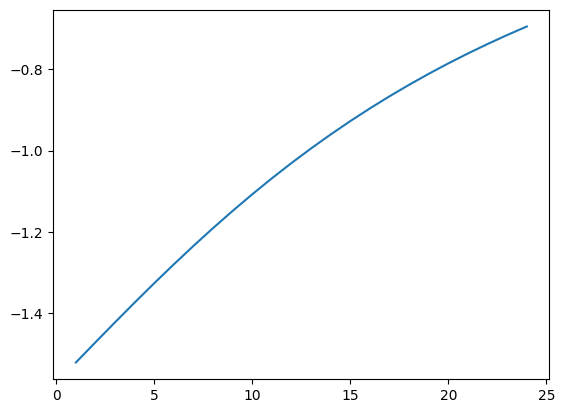

In [7]:
import math

def foo(fc):
    return math.atan(-1/(fc*0.05))

x = [i for i in range(1, 25)]
y = [foo(val) for val in x]
print(y)

import matplotlib.pyplot as plt
plt.plot(x, y)

In [9]:
print(f"5: {x[5], y[5]}")
print(f"20: {x[20], y[20]}")
m = (y[20]-y[5])/(x[20]-x[5])
print(f"m = {m}")
print(f"c = {m*x[5]-y[5]}")

5: (6, -1.2793395323170293)
20: (21, -0.7610127542247298)
m = 0.03455511853948664
c = 1.4866702435539492
